<a href="https://colab.research.google.com/github/DanielRaww/Machine-Learning/blob/main/Project_Raw_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part I: Convolutional neural networks for image analysis



Exploratory Data Analysis


*   You must conduct a comprehensive statistical analysis of any of the datasets used in the paper and discuss your results.
*   You must develop data visualizations of examples/instances in any of the datasets or your statistical analyses and discuss your results.  You may use dimensionality reduction libraries to plot high-dimensional data.



Reproduce research results

*   You must use TensorFlow APIs to imitate Fig. 4 in the paper for ResNet-50 and ResNet-101 and reproduce the results in Tab 3 and Tab 4 for both ResNet-50 and ResNet-101 and discuss your experiment.



In [ ]:
#Exploratory data analysis
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load the CIFAR10 dataset. It comes with training and testing sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Combing training and testing sequences for EDA
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Some info on the dataset
print('Number of categories: ', len(np.unique(targets)))
print('Shape of image matrix: ', data.shape)
print('Shape of target matrix: ', targets.shape)
print('Number of images: ', len(data))

# RBG info
# Get max and min intensity of each in sample image
R, B, G = data[2].T
print('Max R value of first image: ', np.max(R))
print('Min R value of first image: ', np.min(R))
print('Max B value of first image: ', np.max(B))
print('Min B value of first image: ', np.min(B))
print('Max G value of first image: ', np.max(G))
print('Min G value of first image: ', np.min(G))

Number of categories:  10
Shape of image matrix:  (60000, 32, 32, 3)
Shape of target matrix:  (60000, 1)
Number of images:  60000
Max R value of first image:  255
Min R value of first image:  23
Max B value of first image:  255
Min B value of first image:  20
Max G value of first image:  255
Min G value of first image:  21


In [ ]:
# Initialize arrays
# Hold average R, B, or G value for each image
meanR = []
meanB = []
meanG = []

for i in range(len(data)):
    R, B, G = data[i].T
    meanR.append(np.mean(R))
    meanB.append(np.mean(B))
    meanG.append(np.mean(G))

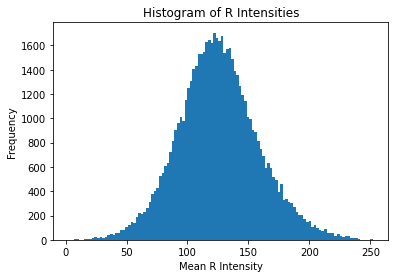

Average of meanR [141.205078125, 130.19921875, 133.484375, 99.9794921875, 92.021484375, 142.4404296875, 120.53125, 132.4521484375, 109.1650390625, 78.13671875, 77.74609375, 156.4248046875, 120.6201171875, 79.7607421875, 93.814453125, 117.2685546875, 140.6396484375, 97.328125, 140.107421875, 110.5390625, 172.2568359375, 214.310546875, 81.453125, 119.98828125, 90.04296875, 142.0029296875, 109.158203125, 68.5703125, 133.0908203125, 147.90625, 133.919921875, 129.3955078125, 96.9140625, 128.6572265625, 135.2060546875, 142.697265625, 163.6767578125, 85.0498046875, 128.669921875, 110.0478515625, 126.4580078125, 212.091796875, 149.2138671875, 156.814453125, 105.4736328125, 116.7646484375, 111.8447265625, 70.46875, 183.3955078125, 194.7734375, 77.158203125, 138.8154296875, 122.8505859375, 160.3974609375, 73.3125, 148.2880859375, 142.2744140625, 82.7646484375, 135.884765625, 88.0078125, 114.744140625, 135.6455078125, 94.6396484375, 70.0341796875, 130.126953125, 138.8505859375, 123.087890625, 166

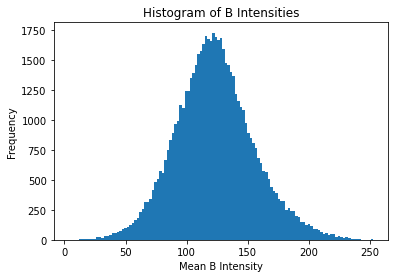

Average of meanB [105.099609375, 130.365234375, 135.15234375, 83.279296875, 102.400390625, 70.7802734375, 152.916015625, 134.7744140625, 156.2373046875, 71.5634765625, 81.193359375, 137.7353515625, 142.3447265625, 72.4619140625, 98.9130859375, 144.2568359375, 143.4697265625, 87.9658203125, 124.4384765625, 132.4287109375, 175.8984375, 38.91796875, 70.7744140625, 103.251953125, 88.4423828125, 133.732421875, 83.2529296875, 70.318359375, 129.408203125, 148.65234375, 124.71875, 128.2822265625, 100.228515625, 122.9921875, 142.375, 120.564453125, 163.2724609375, 92.0810546875, 126.9716796875, 118.029296875, 117.6962890625, 187.935546875, 143.6162109375, 133.9482421875, 106.8076171875, 89.29296875, 112.66796875, 101.671875, 198.13671875, 193.1767578125, 101.3916015625, 106.0458984375, 112.4072265625, 168.69140625, 94.6044921875, 161.603515625, 102.498046875, 79.0517578125, 118.34765625, 99.3818359375, 112.880859375, 138.2744140625, 122.5029296875, 90.0751953125, 101.5791015625, 134.822265625, 

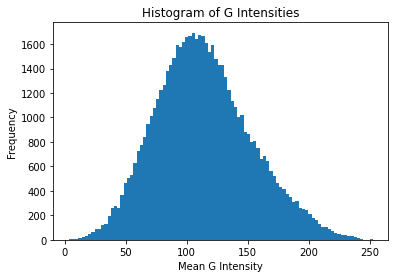

Average of meanG [64.037109375, 130.4775390625, 132.5849609375, 57.4140625, 116.0029296875, 57.7783203125, 85.3779296875, 97.869140625, 188.9833984375, 61.7958984375, 62.39453125, 129.2265625, 134.0400390625, 75.7978515625, 86.224609375, 161.869140625, 137.830078125, 81.4873046875, 117.7548828125, 114.3212890625, 180.5625, 58.744140625, 54.0302734375, 73.1015625, 80.6689453125, 115.94140625, 58.5859375, 71.4384765625, 112.3203125, 149.2548828125, 120.6611328125, 120.71484375, 96.494140625, 109.30859375, 98.13671875, 65.90625, 158.328125, 80.46484375, 139.134765625, 108.8349609375, 99.37890625, 152.603515625, 112.06640625, 118.9033203125, 91.9248046875, 73.3984375, 107.7666015625, 123.8447265625, 168.232421875, 193.103515625, 103.7880859375, 92.859375, 87.8720703125, 164.2783203125, 55.005859375, 132.7978515625, 62.8017578125, 58.5400390625, 70.857421875, 112.5712890625, 122.9638671875, 137.8203125, 145.0498046875, 67.509765625, 98.0048828125, 137.4248046875, 88.30078125, 150.982421875,

In [ ]:
# Histogram of average R intensity
plt.hist(meanR, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('Mean R Intensity')
plt.title('Histogram of R Intensities')
plt.show()
print('Average of meanR', meanR )

# Histogram of average B intensity
plt.hist(meanB, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('Mean B Intensity')
plt.title('Histogram of B Intensities')
plt.show()
print('Average of meanB', meanB )


# Histogram of average G intensity
plt.hist(meanG, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('Mean G Intensity')
plt.title('Histogram of G Intensities')
plt.show()
print('Average of meanG', meanG )


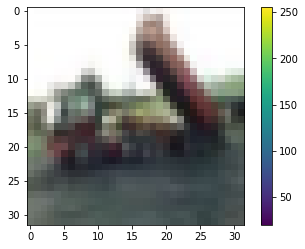

In [ ]:
# Plot the second image in the set
plt.figure()
plt.imshow(data[2])
plt.colorbar()
plt.grid(False)
plt.show()

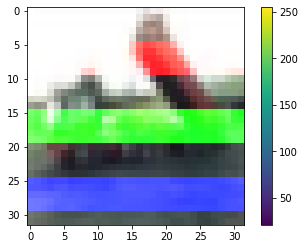

In [ ]:
#supervised learning
# Set R, B, and G values to maximum intensity in set regions
temp = data[2]
temp[5:10, : , 0] = 255
temp[15:20, : , 1] = 255
temp[25:30, : , 2] = 255

# Show image of altered RBG values
plt.figure()
plt.imshow(temp)
plt.colorbar()
plt.grid(False)
plt.show()

#EDA for Keras.Cifar-10 dataset

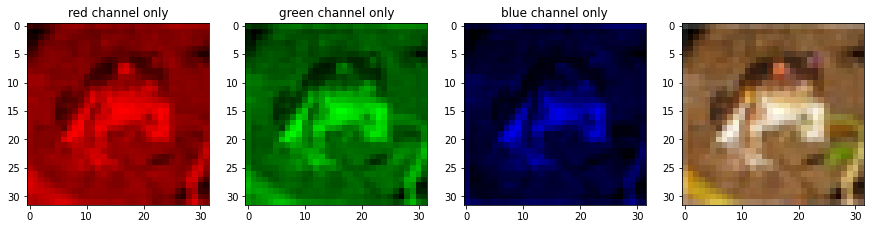

In [ ]:
# RGB values and visualization for any single image
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
# loop through the axes
for c, chanl, ax in zip(range(4), ['red', 'green', 'blue', 'all'], axs):
    if c == 3:
        ax.imshow(x_train[0])
        continue
    # create a zero matrix
    split_img = np.zeros(x_train[0].shape, dtype='uint8') # default dtype is numpy float 64
    # assign each channel
    split_img[:,:,c] = x_train[0][:,:,c]
    # display each channel
    ax.imshow(split_img)
    ax.set_title('{} channel only'.format(chanl))
    
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import time
import sys
from tqdm import tqdm
import seaborn as sns

In [ ]:
(trainX, trainY), (validX, validY) = keras.datasets.cifar10.load_data()
data = np.concatenate((trainX, validX), axis=0)
targets = np.concatenate((trainY, validY), axis=0)
targetIndex = np.zeros((10),dtype='int8')
vals = np.zeros((10, 5000, 32, 32, 3))

# Put each image into the vals array based on (class, imageIndexInClass, x, y, c)
for i in tqdm(range(len(data))):
    vals[targets[i],targetIndex[targets[i]][0],:,:,:] = data[i]
    targetIndex[targets[i]] += 1

# For each class, sum the R/G/B values then average them.
for cl in range(10):
    colorSums=np.zeros((3))# 0 = R, 1 = G, 2 = B
    for im in vals[cl,:]:
        colorSums[0] += np.sum(im[:,:,0])
        colorSums[1] += np.sum(im[:,:,1])
        colorSums[2] += np.sum(im[:,:,2])
    colorSums = colorSums / (128 * 32 * 32) # 128 because everything after 128 is just zeros.
    print("Average of Class ", cl, " (R, G, B): ", colorSums)

100%|██████████| 60000/60000 [00:01<00:00, 44754.04it/s]


Average of Class  0  (R, G, B):  [271.6263504  291.86301422 313.58109283]
Average of Class  1  (R, G, B):  [238.62414551 233.69045258 232.97183228]
Average of Class  2  (R, G, B):  [246.65664673 249.55544281 216.15424347]
Average of Class  3  (R, G, B):  [244.40921021 226.97429657 206.44418335]
Average of Class  4  (R, G, B):  [238.45875549 236.72861481 188.86962891]
Average of Class  5  (R, G, B):  [253.65607452 237.83774567 214.00257111]
Average of Class  6  (R, G, B):  [246.22307587 226.68778229 176.28266144]
Average of Class  7  (R, G, B):  [254.42126465 242.38922882 212.13983917]
Average of Class  8  (R, G, B):  [248.78514099 265.72801208 281.12106323]
Average of Class  9  (R, G, B):  [254.49866486 247.30386353 246.37685394]


In [ ]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
c7 = []
c8 = []
c9 = []

for i in range(len(data)):
    if targets[i] == 0:
        c0.append(data[i])
    elif targets[i] == 1:
        c1.append(data[i])
    elif targets[i] == 2:
        c2.append(data[i])
    elif targets[i] == 3:
        c3.append(data[i])
    elif targets[i] == 4:
        c4.append(data[i])
    elif targets[i] == 5:
        c5.append(data[i])
    elif targets[i] == 6:
        c6.append(data[i])
    elif targets[i] == 7:
        c7.append(data[i])
    elif targets[i] == 8:
        c8.append(data[i])
    elif targets[i] == 9:
        c9.append(data[i])


c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
c5 = np.array(c5)
c6 = np.array(c6)
c7 = np.array(c7)
c8 = np.array(c8)
c9 = np.array(c9)


bigboy = [c0,c1,c2,c3,c4,c5,c6,c7,c8,c9]

doubleAVGR = [] # will contain double avg of R channel intensities indexed for each class 0-9
doubleAVGB = [] # ditto but for B
doubleAVGG = [] # ditto but for G

In [ ]:
# c0 # we will divide the sum_of_avg by 6000 since we have 6000 images --> 6000 color channel slices


for c in bigboy:
    sum_of_avgR = 0
    sum_of_avgB = 0
    sum_of_avgG = 0
    for i in range(len(c0)):
        # retrieve 32x32 slices of image tensor according to color channel
        R, B, G = c[i].T

        # calculate means
        avgR_for_image = np.mean(R)
        avgB_for_image = np.mean(B)
        avgG_for_image = np.mean(G)

        # add means to sum_of_avg
        sum_of_avgR += avgR_for_image
        sum_of_avgB += avgB_for_image
        sum_of_avgG += avgG_for_image

    avg_of_avgR = sum_of_avgR/6000
    avg_of_avgB = sum_of_avgB/6000
    avg_of_avgG = sum_of_avgG/6000

    doubleAVGR.append(avg_of_avgR)
    doubleAVGB.append(avg_of_avgB)
    doubleAVGG.append(avg_of_avgG)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


average R value 127.44401822916667


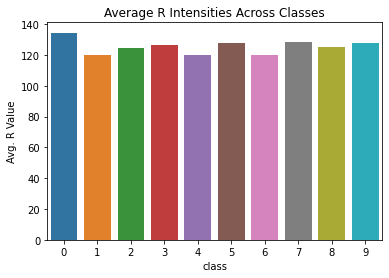

In [ ]:
ax = sns.barplot(np.unique(targets),doubleAVGR) 
ax.set(xlabel = 'class')
ax.set(title = 'Average R Intensities Across Classes')
ax.set(ylabel = 'Avg. R Value')
print('average R value', avg_of_avgR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


average B value 123.97094482421875


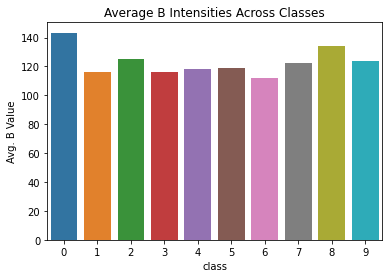

In [ ]:
ax = sns.barplot(np.unique(targets),doubleAVGB) 
ax.set(xlabel = 'class')
ax.set(title = 'Average B Intensities Across Classes')
ax.set(ylabel = 'Avg. B Value')
print('average B value',avg_of_avgB)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


average G value 122.21742041015625


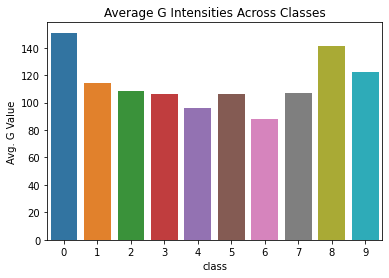

In [ ]:
ax = sns.barplot(np.unique(targets),doubleAVGG) 
ax.set(xlabel = 'class')
ax.set(title = 'Average G Intensities Across Classes')
ax.set(ylabel = 'Avg. G Value')
print('average G value',avg_of_avgG)

In [ ]:
#Reproducing research results
from matplotlib import pyplot as plot
import tensorflow as tf
import keras
import numpy
from keras.datasets import cifar10
import tensorflow.keras.applications.resnet as rn

In [ ]:
# To match Figure 3, we need error%. We have accuracy%. 1 - accuracy = error.
# histories is a list of the history-objects returned from model.fit()
# colorCodes and iterLabels are lists of strings, e.g. ['blue','red'] and ['RN50','RN101']
def plotAccuracies(histories, epochCount, colorCodes, iterLabels):
    for i, history in enumerate(histories):
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(epochCount)
        plot.plot(epochs, [1 - x for x in train_acc], color = colorCodes[i], markersize = 12, linewidth = 1, label = iterLabels[i] + ' T Error')
        plot.plot(epochs, [1 - x for x in val_acc], color = colorCodes[i], markersize = 12, linewidth = 2, label = iterLabels[i] + ' V Error')
    plot.legend()
    plot.show()

# Data dump. Headers are the same as iterLabels in plotAccuracies()
def printHistories(histories, headers):
    for i, history in enumerate(histories):
        print(headers[i])
        print(history.history)

# Plots the loss values over epochs. Identical signature to plotAccuracies()
def plotHistories(histories, epochCount, colorCodes, iterLabels):
    for i, history in enumerate(histories):
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(epochCount)
        plot.plot(epochs, train_loss, color = colorCodes[i], markersize = 12, linewidth = 1, label = iterLabels[i] + ' T Loss')
        plot.plot(epochs, val_loss, color = colorCodes[i], markersize = 12, linewidth = 2, label = iterLabels[i] + ' V Loss')
    plot.legend()
    plot.show()

171450368/171446536 [==============================] - 3s 0us/step
Epoch 1/20
391/391 [==============================] - 220s 552ms/step - loss: 3.6869 - accuracy: 0.5160 - top_k_categorical_accuracy: 0.9149 - val_loss: 4.3767 - val_accuracy: 0.5126 - val_top_k_categorical_accuracy: 0.9324
Epoch 2/20
391/391 [==============================] - 214s 547ms/step - loss: 2.8507 - accuracy: 0.6025 - top_k_categorical_accuracy: 0.9582 - val_loss: 3.4727 - val_accuracy: 0.5744 - val_top_k_categorical_accuracy: 0.9488
Epoch 3/20
391/391 [==============================] - 214s 549ms/step - loss: 2.7334 - accuracy: 0.6160 - top_k_categorical_accuracy: 0.9654 - val_loss: 3.4096 - val_accuracy: 0.5891 - val_top_k_categorical_accuracy: 0.9518
Epoch 4/20
391/391 [==============================] - 221s 565ms/step - loss: 2.6001 - accuracy: 0.6366 - top_k_categorical_accuracy: 0.9672 - val_loss: 3.3041 - val_accuracy: 0.5926 - val_top_k_categorical_accuracy: 0.9546
Epoch 5/20
391/391 [=================

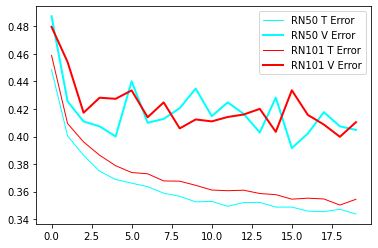

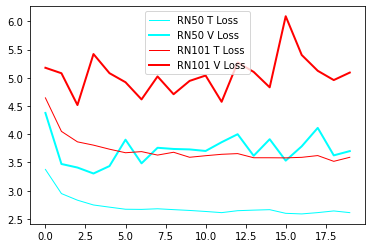

RN50
{'loss': [3.376270294189453, 2.9482388496398926, 2.831167221069336, 2.746213436126709, 2.7077863216400146, 2.6707839965820312, 2.6680874824523926, 2.6790409088134766, 2.66385817527771, 2.6494619846343994, 2.631326913833618, 2.61072039604187, 2.6451056003570557, 2.6550846099853516, 2.663151264190674, 2.598410129547119, 2.5879549980163574, 2.611151933670044, 2.6406142711639404, 2.6107006072998047], 'accuracy': [0.5514400005340576, 0.5995200276374817, 0.6136999726295471, 0.6251800060272217, 0.6312199831008911, 0.633899986743927, 0.63646000623703, 0.6411799788475037, 0.6434400081634521, 0.6474999785423279, 0.6470999717712402, 0.6506999731063843, 0.6480200290679932, 0.6478599905967712, 0.6513000130653381, 0.6512799859046936, 0.65420001745224, 0.6545799970626831, 0.652899980545044, 0.6562399864196777], 'top_k_categorical_accuracy': [0.9370800256729126, 0.9566799998283386, 0.962119996547699, 0.9648399949073792, 0.9671199917793274, 0.9686800241470337, 0.9701200127601624, 0.970160007476806

INFO:tensorflow:Assets written to: rn50/assets


INFO:tensorflow:Assets written to: rn101/assets


INFO:tensorflow:Assets written to: rn101/assets


In [ ]:
# Load the CIFAR10 dataset. It comes with training and validation sets.
(trainX, trainY), (validX, validY) = cifar10.load_data()

# Preprocess the X side of the data. ImageNet trained on (224,224,3), we have (32,32,3)
trainX = tf.keras.applications.resnet50.preprocess_input(trainX)
validX = tf.keras.applications.resnet50.preprocess_input(validX)
# Preprocess the Y side of the data. Make it into a one-hot 10-class output.
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10, dtype='int')
validY = tf.keras.utils.to_categorical(validY, num_classes=10, dtype='int')

# Parameter Setting. On a 3.6ghz 8-core processor, this takes 2 - 2.5 minutes per epoch.
# High level of diminishing returns after 5 and 10 epochs.
epochToRun = 20
batchSize = 128

# Build an instance of the loss measure.
# - Normal CategoricalCrossentropy wants your Y shapes to be of the from [?, NUM_OF_CLASSES]
cce = tf.keras.losses.CategoricalCrossentropy()

# Build an instance of the optimizer.
# Source paper, page 7: LR of 0.1 isn't good for ResNet, it doesn't converge well.
sgd = keras.optimizers.SGD(lr = 0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Build the instance of the model.
# Note that if you aren't using weights='imagenet' and input_shape=[224,224,4], you MUST set include_top=false
# Pooling can be 'avg' or 'max' (there are other values too)
# Be sure to set the classes to the number from your dataset (in this case 10)
model_rn50 = tf.keras.applications.ResNet50(include_top=False, input_tensor=None, input_shape=[32, 32, 3], pooling='avg', weights='imagenet', classes=10)
model_rn101 = tf.keras.applications.ResNet101(include_top=False, input_tensor=None, input_shape=[32, 32, 3], pooling='avg', weights='imagenet', classes=10)

# Compile the model: loss is what we've defined as 'scce' (SparseCategoricalCrossentropy()), 
# optimizer is our sgd variable, metrics is 'accuracy'
# 'accuracy' measures how often predictions equal labels 
model_rn50.compile(loss=cce, optimizer=sgd, metrics=['sparse_categorical_accuracy'])
model_rn101.compile(loss=cce, optimizer=sgd, metrics=['sparse_categorical_accuracy'])

# We create a secondary model that has our RN50 model plus a dense layer to account for our one-hot output.
mainmodel_rn50 = keras.models.Sequential()  # Build an empty model
mainmodel_rn50.add(model_rn50)  # Add the original
mainmodel_rn50.add(keras.layers.Dense(10, activation = 'softmax')) # Add the dense layer
mainmodel_rn50.layers[0].trainable = False # Don't train the pretrained layers - so much time saved
mainmodel_rn50.compile(optimizer = sgd, loss = cce, metrics = ['accuracy', 'top_k_categorical_accuracy']) # Recompile

mainmodel_rn101 = keras.models.Sequential()  # Build an empty model
mainmodel_rn101.add(model_rn101)  # Add the original
mainmodel_rn101.add(keras.layers.Dense(10, activation = 'softmax')) # Add the dense layer
mainmodel_rn101.layers[0].trainable = False # Don't train the pretrained layers - so much time saved
mainmodel_rn101.compile(optimizer = sgd, loss = cce, metrics = ['accuracy', 'top_k_categorical_accuracy']) # Recompile

# Train the model
rn50 = mainmodel_rn50.fit(trainX, trainY, epochs = epochToRun, batch_size = batchSize, validation_data = (validX, validY))
rn101 = mainmodel_rn101.fit(trainX, trainY, epochs = epochToRun, batch_size = batchSize, validation_data = (validX, validY))

# rn50 is now a history-object we can use for data visualization.
# NOTE: This section contains references to rn101, to show what it would look like with both models superimposed in the plots.
# The colors used in the paper were red and aqua.
plotAccuracies([rn50, rn101], epochToRun, ['aqua', 'red'], ['RN50','RN101'])
plotHistories([rn50, rn101], epochToRun, ['aqua', 'red'], ['RN50','RN101'])
printHistories([rn50, rn101], ['RN50','RN101'])

# Want to save your model so you can load it later to test, or anything else you might need?
tf.keras.models.save_model(
    mainmodel_rn50, 'rn50', overwrite=True, include_optimizer=True)

tf.keras.models.save_model(
    mainmodel_rn101, 'rn101', overwrite=True, include_optimizer=True)
# Look in the directory where your .ipynb file is. Notice there's a folder called 'rn50'.
# There's an equivalent API for loading the saved model.

Part II: Transformers for text analysis

Exploratory Data Analysis

*   You must conduct a comprehensive statistical analysis of the natural language datasets in tf.keras.datasets and discuss your results.
*   You must develop data visualizations of exampels/instances in any of the natural language datasets or your statistical analyses and discuss your results.  You may use dimensionality reduction libraries to plot high-dimensional data.



Classify Text


*   You must use the source implementation to train and evaluate a text classifier with a Transformer block on any of the natural language datasets in tf.keras.datasets and discuss your results.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from itertools import islice
from operator import itemgetter
import collections
import itertools
from tabulate import tabulate

In [ ]:
#Download and prepare dataset

vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


In [ ]:
#load_data function
tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
) #Y is positive or negative

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [ ]:
#get_word_index function

tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")

#dictionary = tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")
#dictionary['a']

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
#example

# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data() #return numbers (ranking)
(x_train, y_train), _ = keras.datasets.imdb.load_data() #return numbers (ranking)
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index() #words and the numbers(ranking)
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
#create dictionary of {word, ranking}. Create reverse dictionary {number, ""}
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
#x_train[0] is the first sentence. y_train[0] positive negative
print(decoded_sequence)
#1 is start of sentence

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


8982 Training sequences
2246 Testing sequences
Number of categories:  46
Number of unique words:  24998
Average newswire length:  145.96419665122906


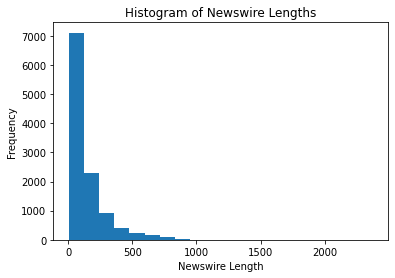

In [ ]:
vocab_size = 25000

# Import our data, per usual. I used Reuters --> replicable with imdb
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=vocab_size)

print(len(x_train), "Training sequences")
print(len(x_test), "Testing sequences")

# Combine training and testing sequences --> 'full picture' of data
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Basic metadata
print('Number of categories: ', len(np.unique(targets)))
print('Number of unique words: ', len(np.unique(np.hstack(data))))

# Investigate the newswires

# Average length of newswire
length = [len(i) for i in data]
print('Average newswire length: ', np.mean(length))

# Histogram of newswire length
#plt.hist(length, bins='auto')
plt.hist(length, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Newswire Length')
plt.title('Histogram of Newswire Lengths')
plt.show()

Average word length (of top 10,000):  7.03576


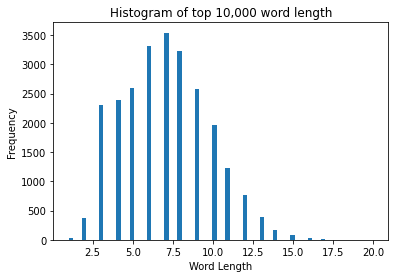

In [ ]:
# Retrieve JSON index to retrieve raw words
ref = tf.keras.datasets.reuters.get_word_index(path='reuters_word_index.json')
# Flip keys and values for easier access
ref = {value:key for key, value in ref.items()}

# Create array of length of words in vocab
wordFrequencies = []
for i in range(vocab_size):
    word = ref.get(i+1)
    wordFrequencies.append(len(word))
print('Average word length (of top 10,000): ', np.mean(wordFrequencies))

# Histogram of vocab word length
plt.hist(wordFrequencies, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('Word Length')
plt.title('Histogram of top 10,000 word length')
plt.show()

In [ ]:
# Attempt to print a sample newswire
''' data[0] is supposed to represent an array of indexes
I tried iterate these indexes for the single newswire, data[0]
I then called the key in the dictionary to retrieve the raw text
However, the output is nonsensical'''
toprint = ' '.join(ref.get(i) for i in data[0])
print(toprint)

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


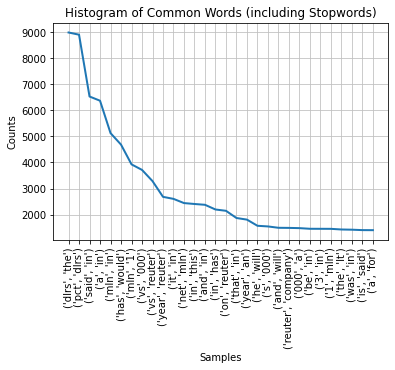

In [ ]:
# combine the whole training set into one corpus. While we're at it,
# translate from the integers to human-readable words
corpus = [ref.get(word) for review in x_train for word in review]
# compute bigrams for the dataset
bgs = nltk.bigrams(corpus)
# compute frequency distribution for all the bigrams
fdist = nltk.FreqDist(bgs)
# plot the 30 most frequent bigrams
plt.title('Histogram of Common Words (including Stopwords)')
fdist.plot(30)

In [ ]:
vocab_size = 25000

# Import our data, per usual.
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(path = "imdb.npz",num_words=vocab_size)


# Combine training and testing sequences --> 'full picture' of data
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

#split dataset into positive review and negative reviews
positive = []
negative = []
for i in range(len(data)):
    if targets[i] == 0:
        negative.append(data[i])
    else:
        positive.append(data[i])

# Retrieve JSON index to retrieve raw words
ref = tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')
# Flip keys and values for easier access
ref = {value:key for key, value in ref.items()}

totalFreq = nltk.FreqDist([ref.get(word) for review in data for word in review])          
negativeFreq = nltk.FreqDist([ref.get(word) for review in negative for word in review])
positiveFreq = nltk.FreqDist([ref.get(word) for review in positive for word in review])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


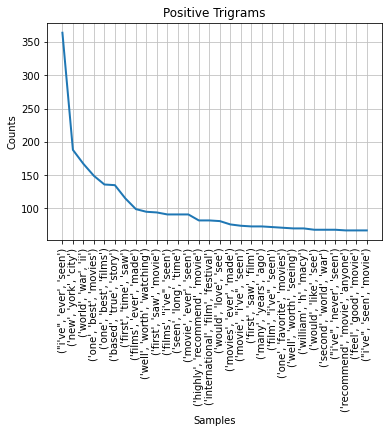

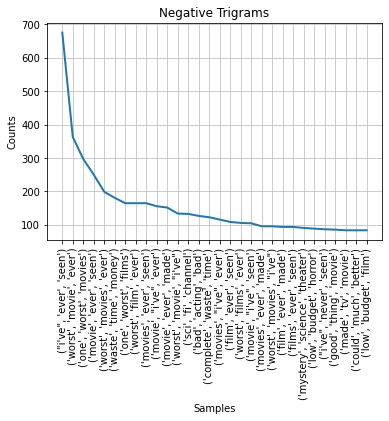

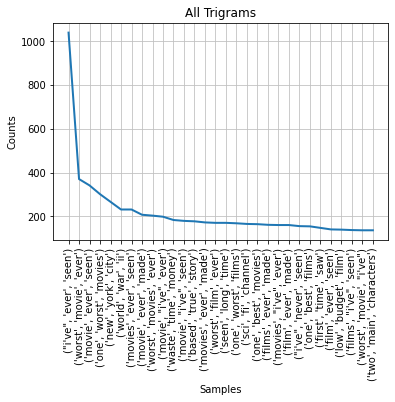

In [ ]:

nltk.download('stopwords')

# create a set of stopwords from nltk corpus
stopwords = set(stopwords.words('english')) 
# add 'br' (seems to be some weird HTML/CSS type thingie)
extra = ['br','#']
for word in extra:
    stopwords.add(word)


index = keras.datasets.imdb.get_word_index() # get the json reference
reverse_index = dict([(value, key) for (key, value) in index.items()]) #reverse the index to get words from numbers


def filtered(data, reverse_index):
  filtered = []
  for review in data:
    to_add = []
    decoded =  [reverse_index.get(i - 3, "#") for i in review] 
    for word in decoded:
      if word not in stopwords:
        to_add.append(word)
    filtered.append(to_add)
  return filtered
# All positive Trigrams
Pcorpus = filtered(positive, reverse_index)
all_ngramsP = []
for review in Pcorpus:
    all_ngramsP.extend(nltk.ngrams(review, 3))

fdistP = nltk.FreqDist(all_ngramsP)
plt.title('Positive Trigrams')
fdistP.plot(30)



# All Negative Trigrams
Ncorpus = filtered(negative, reverse_index)
all_ngramsN = []
for review in Ncorpus:
    all_ngramsN.extend(nltk.ngrams(review, 3))

fdistN = nltk.FreqDist(all_ngramsN)
plt.title('Negative Trigrams')
fdistN.plot(30)


# All Trigrams
corpus = filtered(data, reverse_index)
all_ngrams = []
for review in corpus:
    all_ngrams.extend(nltk.ngrams(review, 3))

fdist = nltk.FreqDist(all_ngrams)
plt.title('All Trigrams')
fdist.plot(30)

In [ ]:
#positiveFreq, negativeFreq, and totalFreq are nltk.FreqDists, num_most_common is an integer.
#Note: you need to reload the frequency distributions (or save an unchanged copy) between runs because this updates them.

#Helper function takes a FreqDist, returns a (sorted) list of n most common words and a list of those words' counts
def getMostCommonWords(distribution, num_most_common):
  words_list = []
  count_list = []
  for item in distribution.most_common(num_most_common):
    words_list.append(item[0])
    count_list.append(item[1])
  return words_list, count_list

#Function that parses and displays the most common words (and optionally their counts) in a pretty (for Python) table.
def mostCommon2Table(dists, titles, num_most_common = 25, numbers_included=True, percent_calculated = False):
  table_data = []
  if numbers_included:
    #displays words and their counts in adjacent columns
    dists_most_common = []
    titles = [[i, i[0:3] + " count"] for i in titles]
    titles = sum(titles, [])
    for dist in dists:
      dists_most_common.append(getMostCommonWords(dist, num_most_common)[0])
      dists_most_common.append(getMostCommonWords(dist, num_most_common)[1])
      if percent_calculated and dist is not totalFreq:
        for i in range(len(dists_most_common[-1])):
          dists_most_common[-1][i] = str(dists_most_common[-1][i]) + " /" + str(totalFreq[dists_most_common[-2][i]]) + " = " + "{:.3%}".format(dists_most_common[-1][i]/totalFreq[dists_most_common[-2][i]])
  else:
    #displays words only, not their counts
    dists_most_common = [getMostCommonWords(dist, num_most_common)[0] for dist in dists]
  #transpose table so tabulate will read it nicely
  for i in range(num_most_common):
    row = []
    for j in dists_most_common:
      row.append(j[i])
    table_data.append(row)
  print(tabulate(table_data, headers = titles, tablefmt="fancy_grid"))


#Subtract the positive and negative distributions from one another to compare what's left.
temp = positiveFreq.copy()
temp2 = negativeFreq.copy()
negativeFreq.subtract(temp)
positiveFreq.subtract(temp2)

#Display
print("Difference between positive and negatives, WITH stop words")
mostCommon2Table([positiveFreq, negativeFreq], ["Positive", "Negative"], 25, numbers_included = True, percent_calculated = True)

#Delete known common "stop words" from the most common lists
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('br') #this is a line separator character I think (from the IMDB dataset)

for word in stop_words:
  del positiveFreq[word]
  del negativeFreq[word]
  del totalFreq[word]

#Display
print("Difference between positive and negatives, WITHOUT stop words")
mostCommon2Table([positiveFreq, negativeFreq, totalFreq], ["Positive", "Negative", "Total"], 25, numbers_included = True, percent_calculated = True)

Difference between positive and negatives, WITH stop words
╒════════════╤════════════════════════╤════════════╤════════════════════════╕
│ Positive   │ Pos count              │ Negative   │ Neg count              │
╞════════════╪════════════════════════╪════════════╪════════════════════════╡
│ to         │ 28819 /324337 = 8.886% │ on         │ 12148 /87050 = 13.955% │
├────────────┼────────────────────────┼────────────┼────────────────────────┤
│ br         │ 14813 /289379 = 5.119% │ as         │ 11703 /150941 = 7.753% │
├────────────┼────────────────────────┼────────────┼────────────────────────┤
│ of         │ 14359 /666757 = 2.154% │ do         │ 10941 /18393 = 59.485% │
├────────────┼────────────────────────┼────────────┼────────────────────────┤
│ it         │ 12583 /211041 = 5.962% │ with       │ 8929 /95585 = 9.341%   │
├────────────┼────────────────────────┼────────────┼────────────────────────┤
│ this       │ 11692 /186690 = 6.263% │ was        │ 8669 /154887 = 5.597%  │
├────

In [ ]:
#Implement a Transformer block as a layer

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
#Implement embedding layer
#words to vectors

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
#download datasheet
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


In [ ]:
#Create classifier model using transformer layer

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Train and Evaluate
#supervised learning, unsupervised portion?

model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)

Epoch 1/2
782/782 [==============================] - 129s 163ms/step - loss: 0.5230 - accuracy: 0.7076 - val_loss: 0.3467 - val_accuracy: 0.8501
Epoch 2/2
782/782 [==============================] - 127s 162ms/step - loss: 0.1983 - accuracy: 0.9262 - val_loss: 0.3023 - val_accuracy: 0.8754


In [ ]:
#parsing function
imdb_words = tf.keras.datasets.imdb.get_word_index()
import re

#Helper function to parse a string into an array of indices like the imdb dataset
def parse_sentence(sentence):
  sentence = sentence.lower()
  #Gets rid of all punctuation except single quotes
  sentence = re.sub("[^a-z 0-9']", "", sentence)
  sentence_words = sentence.split();
  sentence_indices = list()
  for i in range(len(sentence_words)):
    try:
      imdb_index = imdb_words[sentence_words[i]]
      #Set rare words that the model wasn't trained on (>vocab size) to 0
      if imdb_index > vocab_size:
        imdb_index = 0
      sentence_indices.append(imdb_index)
    except KeyError:
      #Unrecognized words are skipped by IMDB convention
      pass
  return sentence_indices
#A test sentence to parse
#print(parse_sentence("Marvel Studios' Guardians of the Galaxy is a smart, funny, bright, weird and exciting movie. It's a dazzling spectacle of gloriously bizarre entertainment. It boasts of a talented cast, an awesome soundtrack and great special effects. Guardians feels at once both epic and intimate. James Gunn's Guardians of the Galaxy's one of Marvel's best films to date."))

# Print an actual review
index = keras.datasets.imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[6]] )
print(decoded) 

# lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in provincial 18th century england northam and paltrow are a # mixture as friends who must pass through # and lies to discover that they love each other good humor is a # virtue which goes a long way towards explaining the # of the aged source material which has been toned down a bit in its harsh # i liked the look of the film and how shots were set up and i thought it didn't rely too much on # of head shots like most other films of the 80s and 90s do very good results


Part III: Variational autoencoder for image analysis 

Migrate from one framework to another framework

*   You must reproduce the results obtained with the soure implementation, a VAE in PyTorch, which simply entails running the notebook without any errors to serve as a baseline
*   You must migrate the source implementation to TensorFlow and reproduce the baseline results using your TensorFlow implementation



Experiment with different model configurations


*   You must modify the optimizer (in your TensorFlow implementation) to use a different optimization method than Adam and discuss the results as compared to the baseline.
*   You must parameterize the coefficient 0. in the expression for the KL divergence in the loss function (in your TensorFlow implementation) and run experiments using different values for this parameter, which varies the amount of regularization.  Report and discuss your results.



In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
# Displaying routine

def display_images(in_, out, n=1, label=None, count=False):
    for N in range(n):
        if in_ is not None:
            in_pic = in_.data.cpu().view(-1, 28, 28)
            plt.figure(figsize=(18, 4))
            plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = out.data.cpu().view(-1, 28, 28)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')
            if count: plt.title(str(4 * N + i), color='w')

In [ ]:
# Set random seeds

torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [ ]:
BS = 256

my_train_loader, train_info = tfds.load('mnist', split='train', shuffle_files=False, batch_size = BS, with_info = True)
my_test_loader, test_info = tfds.load('mnist', split='test', shuffle_files=False, batch_size = BS, with_info = True)

def process_image(x):
    x = tf.cast(x['image'],tf.float32)
    x = tf.math.multiply(x,1/255)
    return x

my_train_loader = my_train_loader.map(process_image)
my_test_loader = my_test_loader.map(process_image)

In [ ]:
# Define data loading step

batch_size = 256

kwargs = {'num_workers': 1, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
    MNIST('./data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    MNIST('./data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

In [ ]:
# Defining the device

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Defining the model

d = 20

class VAE(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, d ** 2),
            nn.ReLU(),
            nn.Linear(d ** 2, d * 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(d, d ** 2),
            nn.ReLU(),
            nn.Linear(d ** 2, 784),
            nn.Sigmoid(),
        )

    def reparameterise(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = std.data.new(std.size()).normal_()
            return eps.mul(std).add_(mu)
        else:
            return mu

    def forward(self, x):
        mu_logvar = self.encoder(x.view(-1, 784)).view(-1, 2, d)
        mu = mu_logvar[:, 0, :]
        logvar = mu_logvar[:, 1, :]
        z = self.reparameterise(mu, logvar)
        return self.decoder(z), mu, logvar

model = VAE().to(device)

In [ ]:
# Setting the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

In [ ]:
# Reconstruction + β * KL divergence losses summed over all elements and batch

def loss_function(x_hat, x, mu, logvar, β=1):
    BCE = nn.functional.binary_cross_entropy(
        x_hat, x.view(-1, 784), reduction='sum'
    )
    KLD = 0.5 * torch.sum(logvar.exp() - logvar - 1 + mu.pow(2))

    return BCE + β * KLD

====> Test set loss: 544.4362
====> Epoch: 1 Average loss: 189.3990
====> Test set loss: 136.7475
====> Epoch: 2 Average loss: 133.2895
====> Test set loss: 116.7478
====> Epoch: 3 Average loss: 121.5008
====> Test set loss: 108.7819
====> Epoch: 4 Average loss: 116.2401
====> Test set loss: 104.9226
====> Epoch: 5 Average loss: 113.4080
====> Test set loss: 102.3893
====> Epoch: 6 Average loss: 111.5821
====> Test set loss: 101.3392
====> Epoch: 7 Average loss: 110.2908
====> Test set loss: 99.7770
====> Epoch: 8 Average loss: 109.3378
====> Test set loss: 99.5702
====> Epoch: 9 Average loss: 108.5111
====> Test set loss: 98.6569
====> Epoch: 10 Average loss: 107.9123
====> Test set loss: 99.0548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


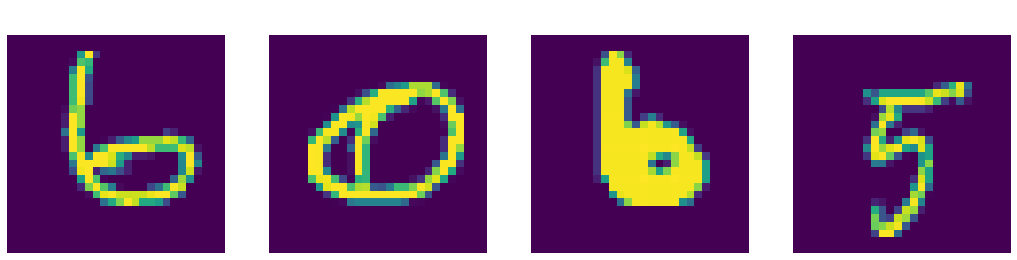

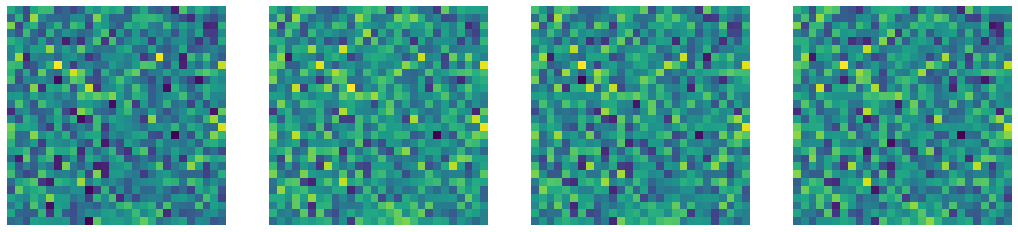

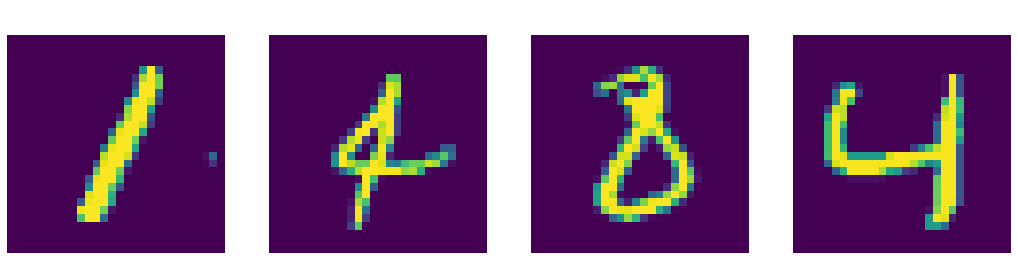

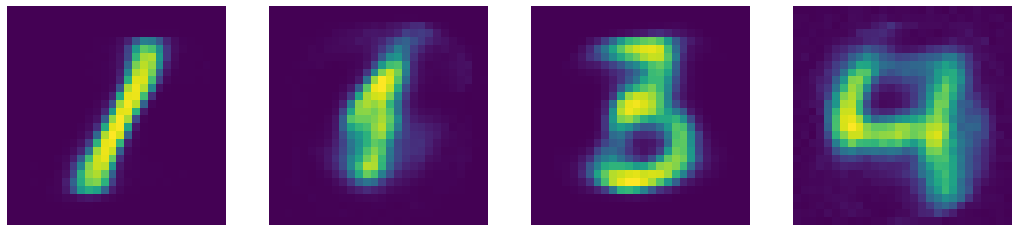

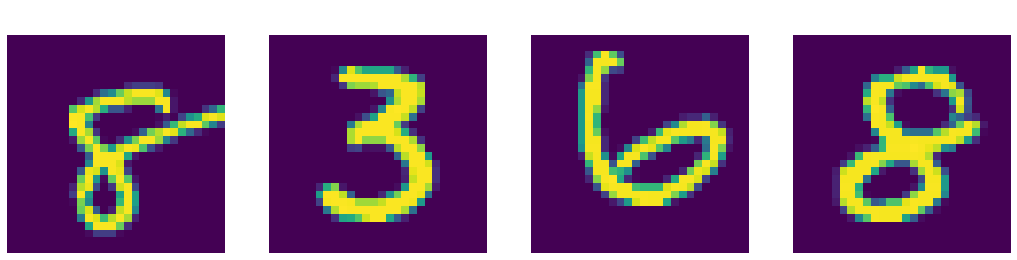

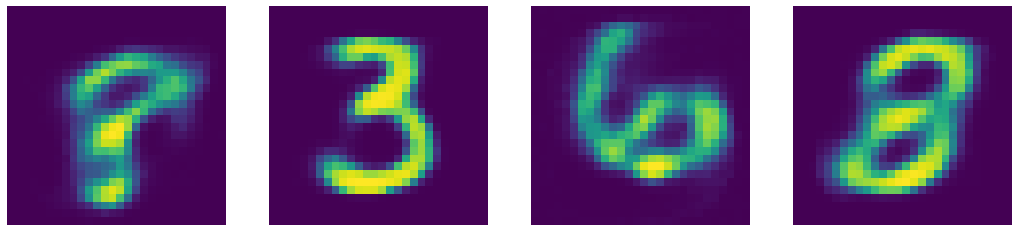

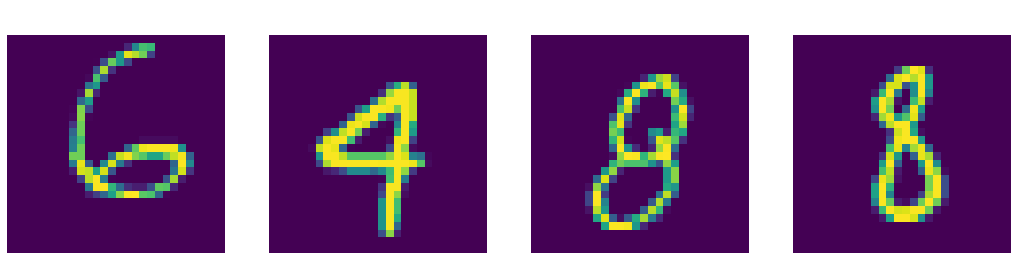

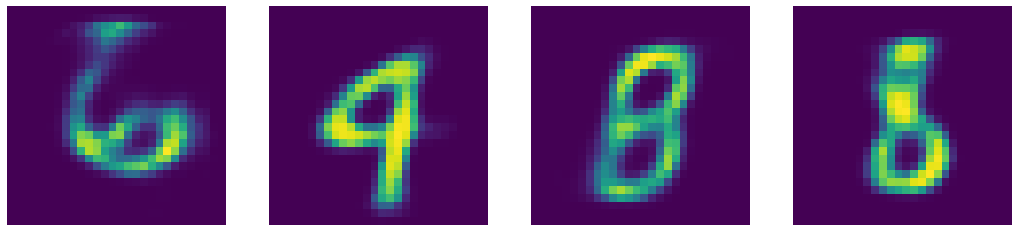

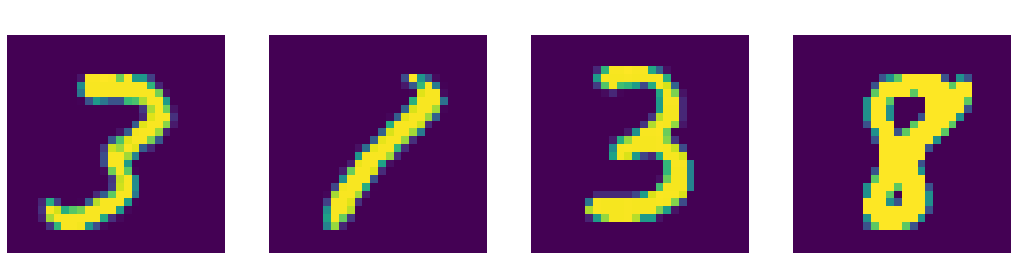

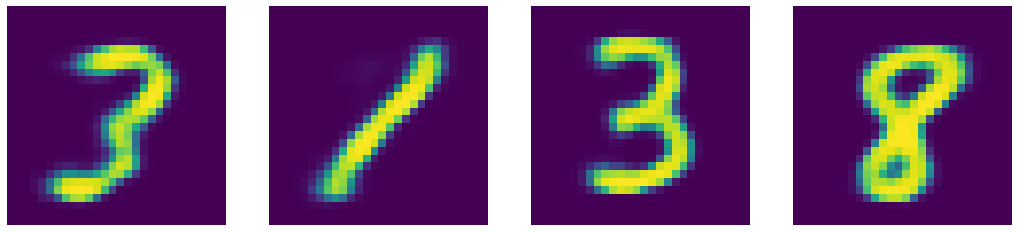

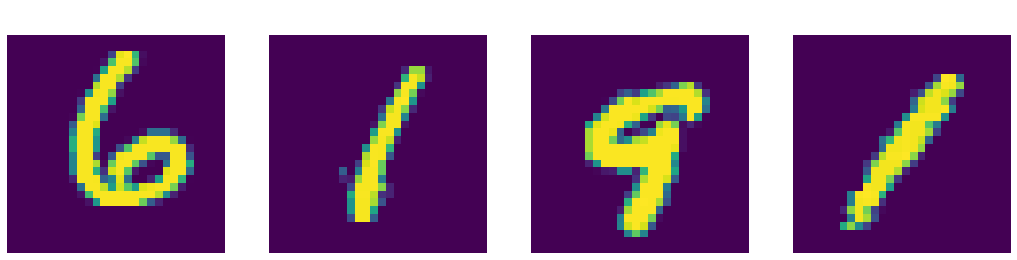

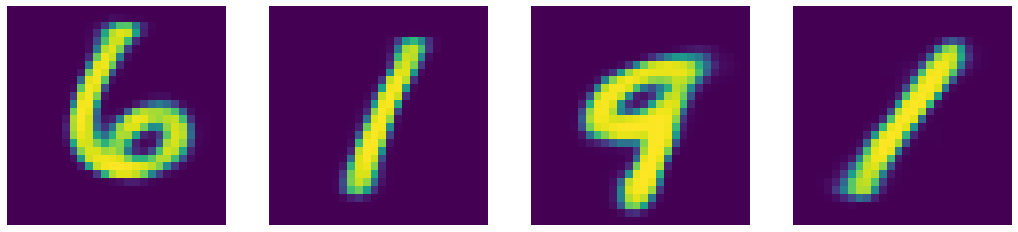

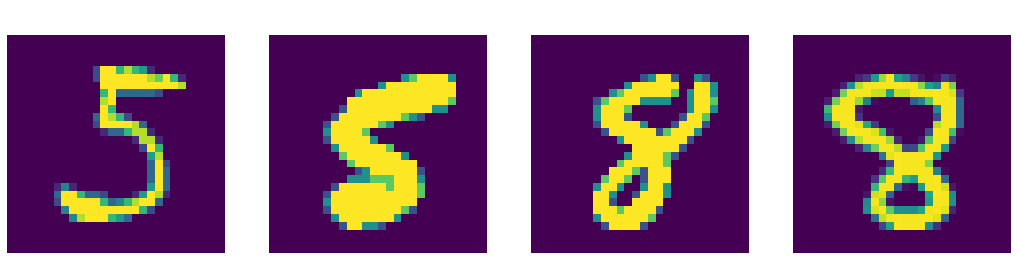

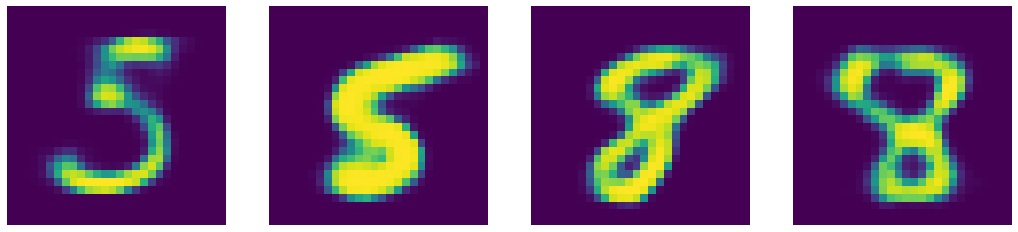

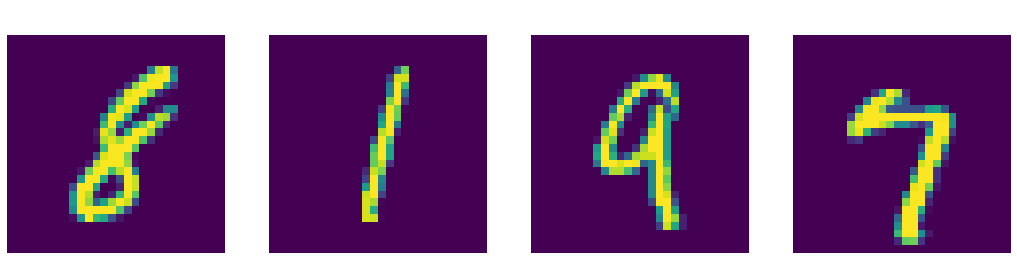

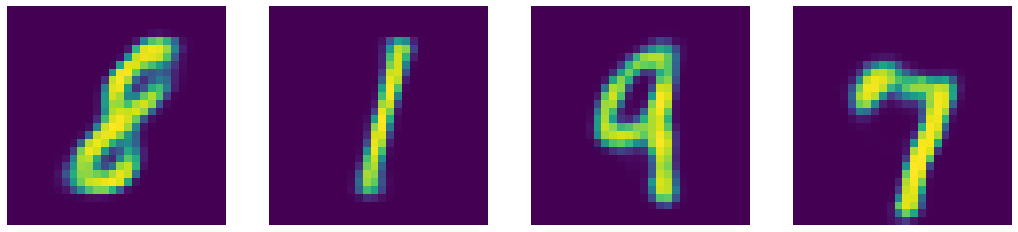

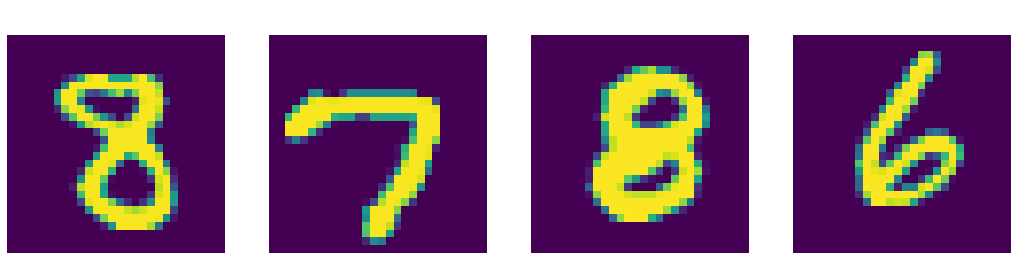

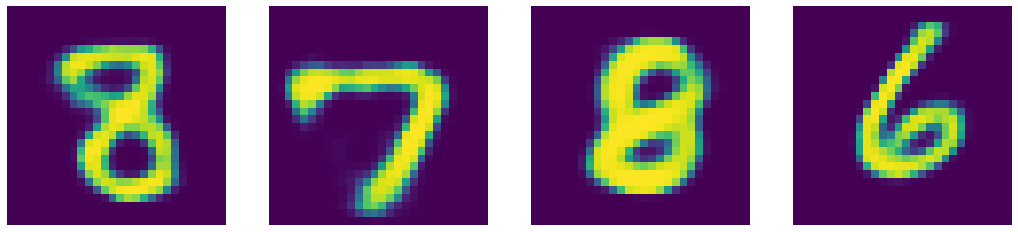

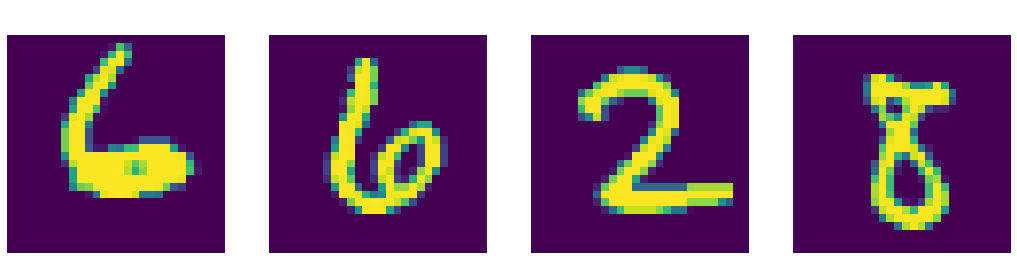

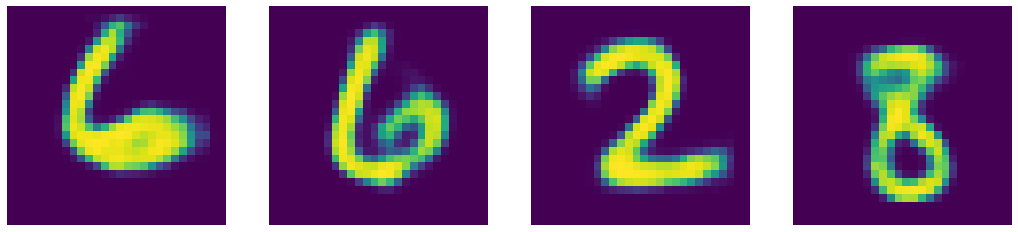

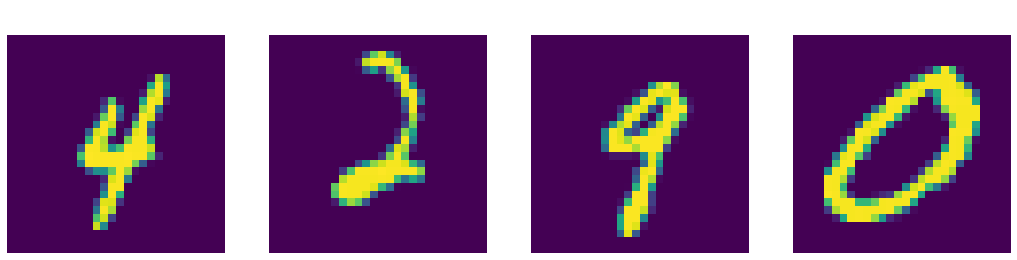

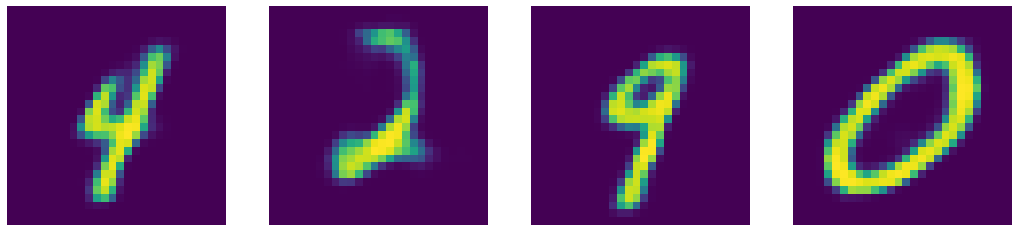

In [ ]:
# Training and testing the VAE

epochs = 10
codes = dict(μ=list(), logσ2=list(), y=list())
for epoch in range(0, epochs + 1):
    # Training
    if epoch > 0:  # test untrained net first
        model.train() #model.train() = True
        train_loss = 0
        for x, _ in train_loader:
            x = x.to(device)
            # ===================forward=====================
            x_hat, mu, logvar = model(x)
            loss = loss_function(x_hat, x, mu, logvar)
            train_loss += loss.item()
            # ===================backward====================
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # ===================log========================
        print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')
    
    # Testing
    
    means, logvars, labels = list(), list(), list()
    with torch.no_grad():
        model.eval()
        test_loss = 0
        for x, y in test_loader:
            x = x.to(device)
            # ===================forward=====================
            x_hat, mu, logvar = model(x)
            test_loss += loss_function(x_hat, x, mu, logvar).item()
            # =====================log=======================
            means.append(mu.detach())
            logvars.append(logvar.detach())
            labels.append(y.detach())
    # ===================log========================
    codes['μ'].append(torch.cat(means))
    codes['logσ2'].append(torch.cat(logvars))
    codes['y'].append(torch.cat(labels))
    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')
    display_images(x, x_hat, 1, f'Epoch {epoch}')

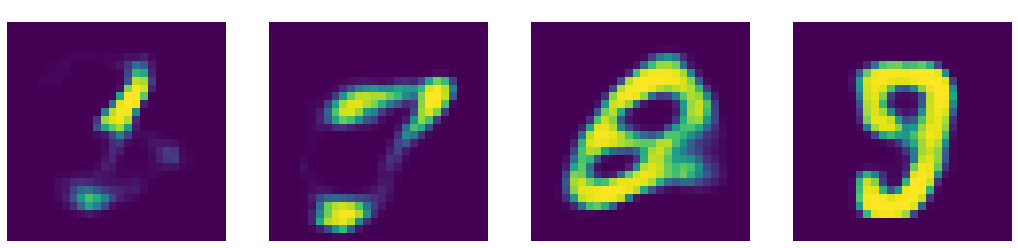

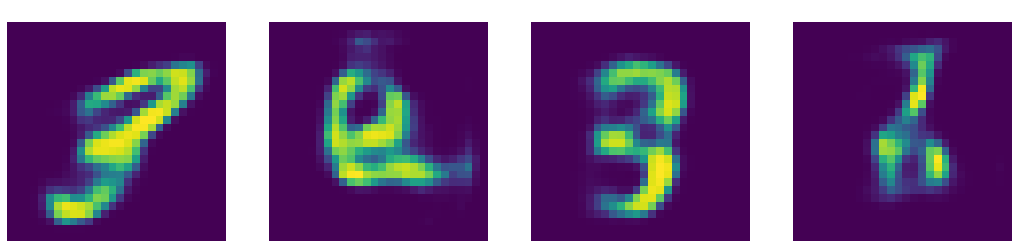

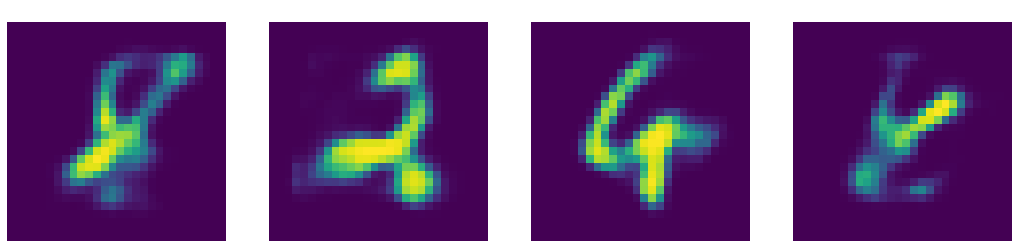

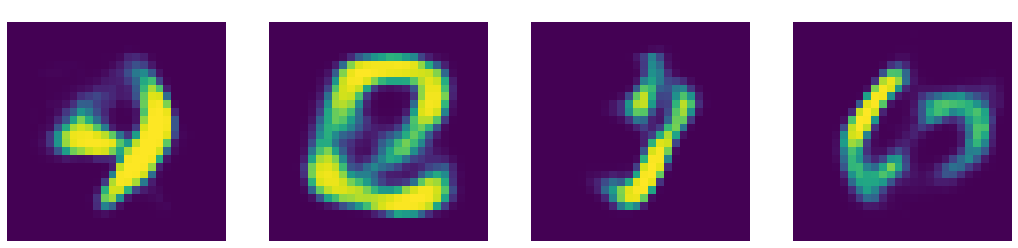

In [ ]:
# Generating a few samples

N = 16
z = torch.randn((N, d)).to(device)
sample = model.decoder(z)
display_images(None, sample, N // 4, count=True)

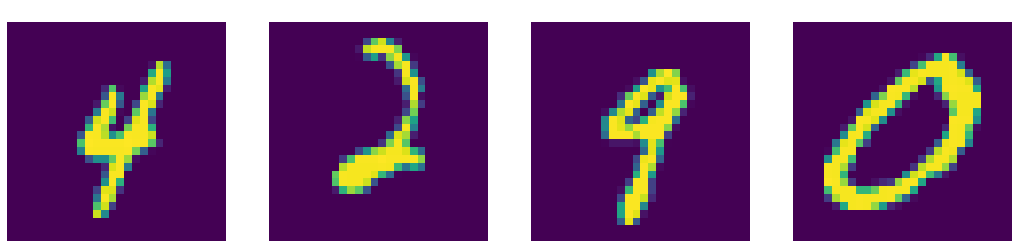

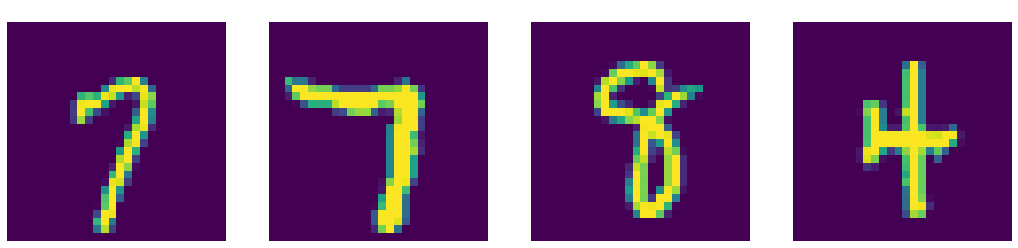

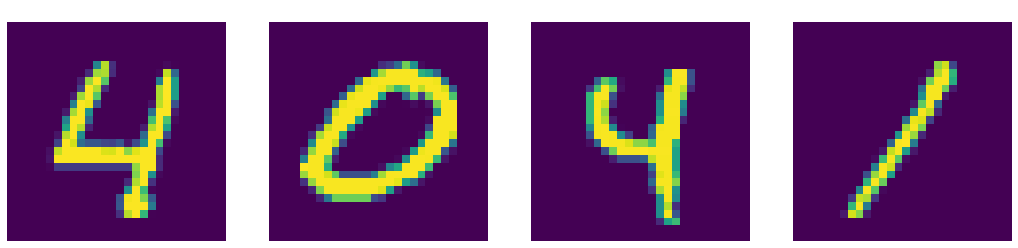

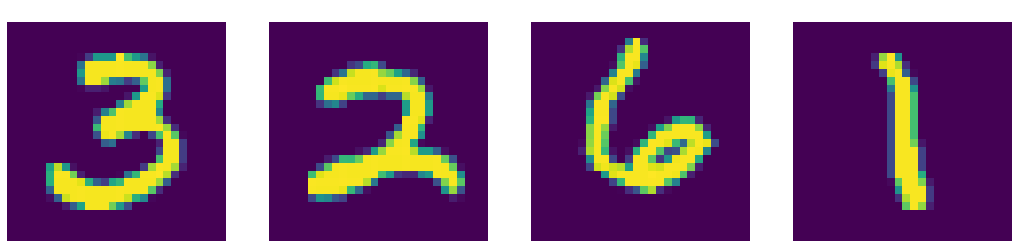

In [ ]:
# Display last test batch

display_images(None, x, 4, count=True)

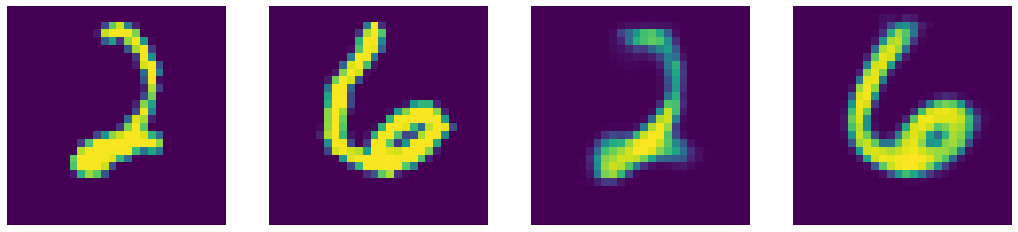

In [ ]:
# Choose starting and ending point for the interpolation -> shows original and reconstructed

A, B = 1, 14
sample = model.decoder(torch.stack((mu[A].data, mu[B].data), 0))
display_images(None, torch.stack(((
    x[A].data.view(-1),
    x[B].data.view(-1),
    sample.data[0],
    sample.data[1]
)), 0))

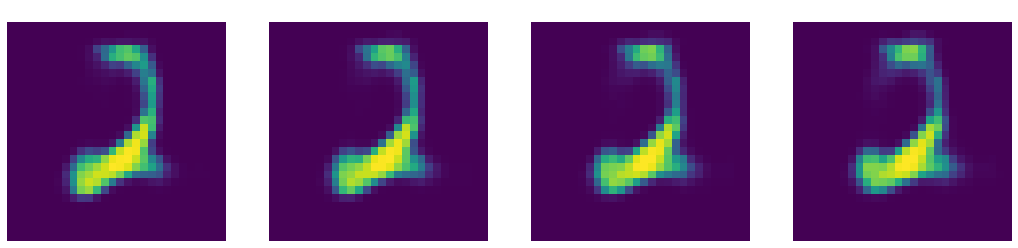

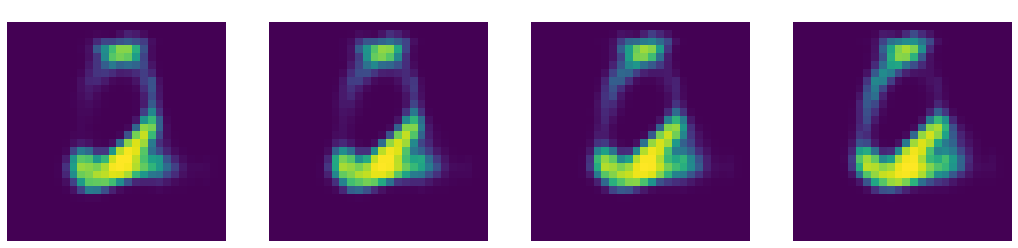

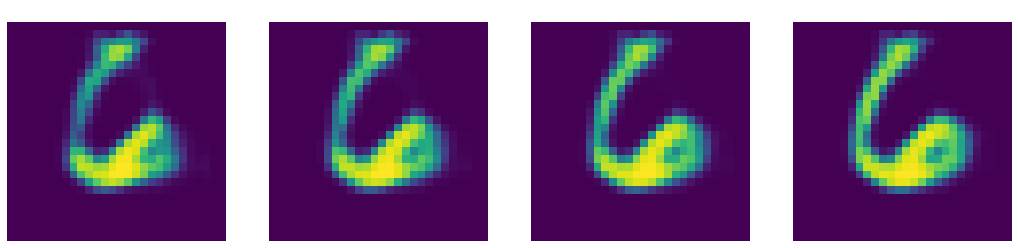

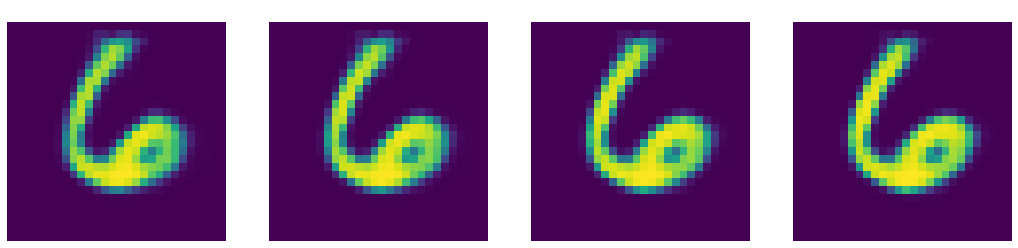

In [ ]:
# Perform an interpolation between input A and B, in N steps

N = 16
code = torch.Tensor(N, 20).to(device)
sample = torch.Tensor(N, 28, 28).to(device)
for i in range(N):
    code[i] = i / (N - 1) * mu[B].data + (1 - i / (N - 1) ) * mu[A].data
    # sample[i] = i / (N - 1) * x[B].data + (1 - i / (N - 1) ) * x[A].data
sample = model.decoder(code)
display_images(None, sample, N // 4, count=True)

In [ ]:
#import numpy as np
#from sklearn.manifold import TSNE
#from res.plot_lib import set_default

In [ ]:
#set_default(figsize=(15, 4))
plt.rcParams["figure.figsize"] = (15, 4)

In [ ]:
X, Y, E = list(), list(), list()  # input, classes, embeddings
N = 1000  # samples per epoch
epochs = (0, 5, 10)
for epoch in epochs:
    X.append(codes['μ'][epoch][:N])
    E.append(TSNE(n_components=2).fit_transform(X[-1]))
    Y.append(codes['y'][epoch][:N])

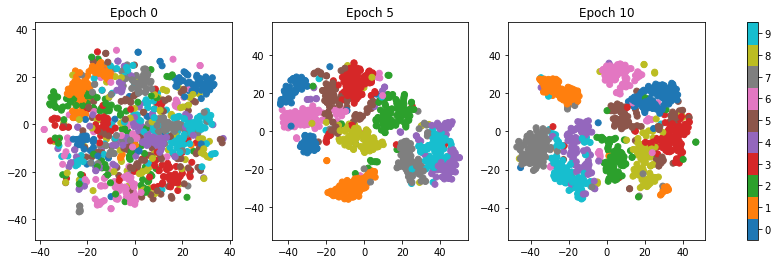

In [ ]:
f, a = plt.subplots(ncols=3)
for i, e in enumerate(epochs):
    s = a[i].scatter(E[i][:,0], E[i][:,1], c=Y[i], cmap='tab10')
    a[i].grid(False)
    a[i].set_title(f'Epoch {e}')
    a[i].axis('equal')
f.colorbar(s, ax=a[:], ticks=np.arange(10), boundaries=np.arange(11) - .5)

In [ ]:
import os
os._exit(00)

Tensor Flow

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import keras
import keras.layers as Layer
import tensorflow_datasets as tfds
import numpy as np
import time

In [ ]:
# Displaying routine

def display_images(in_, out, n=1, label=None, count=False):
    for N in range(n):
        if in_ is not None:
            #in_pic = in_.data.cpu().view(-1, 28, 28)
            in_pic = tf.reshape(in_,(-1, 28, 28))
            plt.figure(figsize=(18, 4))
            plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        #out_pic = out.data.cpu().view(-1, 28, 28)
        out_pic = tf.reshape(out, (-1, 28, 28))
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')
            if count: plt.title(str(4 * N + i), color='w')

In [ ]:
# Define data loading step

BS = 256

my_train_loader, train_info = tfds.load('mnist', split='train', shuffle_files=False, batch_size = BS, with_info = True)
my_test_loader, test_info = tfds.load('mnist', split='test', shuffle_files=False, batch_size = BS, with_info = True)

def process_image(x):
    x['image'] = tf.cast(x['image'],tf.float32)
    x['image'] = tf.math.multiply(x['image'],1/255)
    return x

my_train_loader = my_train_loader.map(process_image)
my_test_loader = my_test_loader.map(process_image)

In [ ]:
d = 20

class my_VAE(tf.Module):
    def __init__(self):
        super().__init__()

        self.encoder = keras.Sequential(
            [keras.Input(shape = (784,)),
            Layer.Dense(d**2, activation = 'relu'),
            Layer.Dense(d * 2, activation = None)]
        )

        self.decoder = keras.Sequential(
            [keras.Input(shape = (d,)),
            Layer.Dense(d**2, activation = 'relu'),
            Layer.Dense(784, activation = 'sigmoid')]
        )
        self.training = True

        

    def reparameterize(self, mu, logvar):
        if self.training:
            std = tf.math.exp(tf.math.multiply(logvar,0.5))
            eps = tf.random.normal(std.shape)
            return tf.math.add(tf.math.multiply(std,eps),mu)
        else:
            return mu

    def __call__(self, x):
        mu_logvar = tf.reshape(self.encoder(tf.reshape(x,(-1,784))),(-1,2,d))
        mu = mu_logvar[:, 0, :]
        logvar = mu_logvar[:, 1, :]
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar
    
my_model = my_VAE()

In [ ]:
# Setting the optimiser

learning_rate = 1e-3


#optimizer = tf.keras.optimizers.Adagrad(
#    learning_rate=0.001,
#    initial_accumulator_value=0.1,
#    epsilon=1e-07)

#optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
#optimizer = tf.keras.optimizers.SGD(
#    learning_rate=learning_rate, momentum=0.0, nesterov=False, name="SGD"
#)
#optimizer = torch.optim.Adam(
#    model.parameters(),
#    lr=learning_rate,
#)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
def BCE_KLD(mu, logvar, β=0.0001):
  def my_loss_function(x, xhat):
    BCE = keras.losses.BinaryCrossentropy(reduction = 'sum')
    BCE_loss = BCE(tf.reshape(x, (-1, 784)), x_hat)*784
    KLD = 0.5 * tf.reduce_sum(tf.math.exp(logvar) - logvar - 1 + tf.math.pow(mu, 2))
    return BCE_loss + β * KLD
  return my_loss_function

# Reconstruction + β * KL divergence losses summed over all elements and batch

#def loss_function(x, x_hat, mu, logvar, β=1):
#    BCE = keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM)(tf.reshape(x,(-1,784)),tf.reshape(x_hat,(-1, 784)))*784
#    KLD = 0.5 * (np.sum(tf.math.exp(logvar) - logvar - 1 + (mu ** 2)))
#    return BCE + β * KLD

====> Test set loss: 543.8246
EPOCH: 1
====> Test set loss: 96.1336
EPOCH: 2
====> Test set loss: 82.6088
EPOCH: 3
====> Test set loss: 78.6342
EPOCH: 4
====> Test set loss: 76.2907
EPOCH: 5
====> Test set loss: 74.5404
EPOCH: 6
====> Test set loss: 73.1623
EPOCH: 7
====> Test set loss: 72.1161
EPOCH: 8
====> Test set loss: 71.2901
EPOCH: 9
====> Test set loss: 70.6036
EPOCH: 10
====> Test set loss: 70.0488
Time elapsed 130.11490869522095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


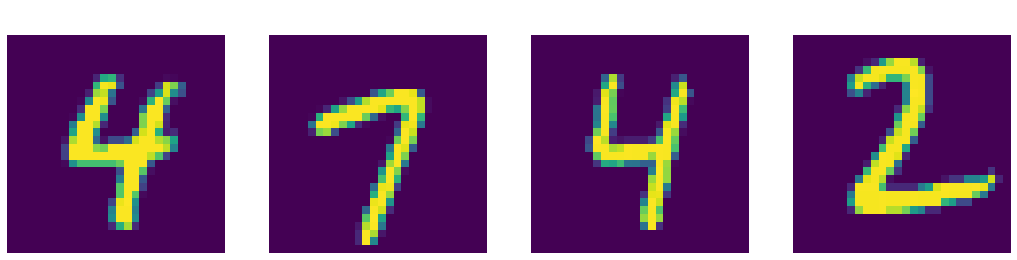

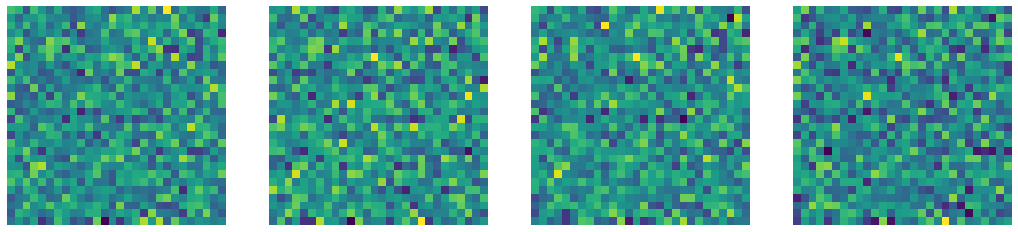

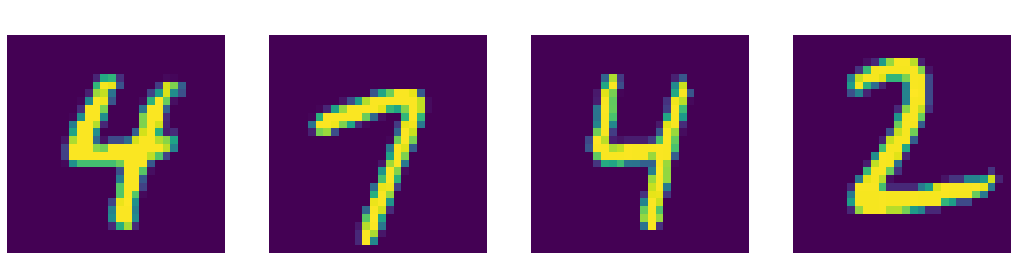

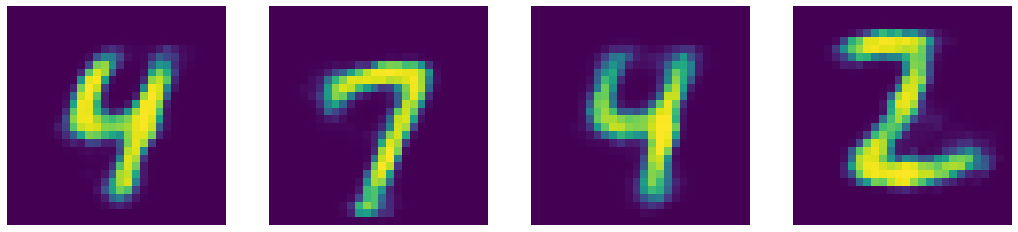

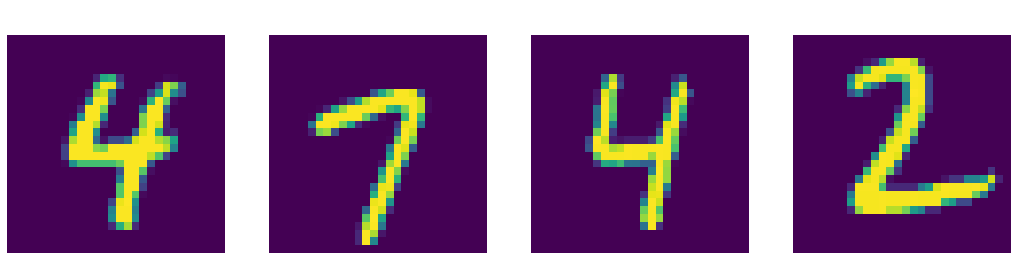

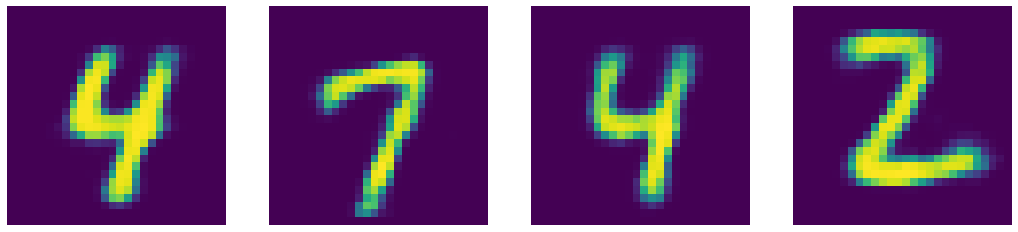

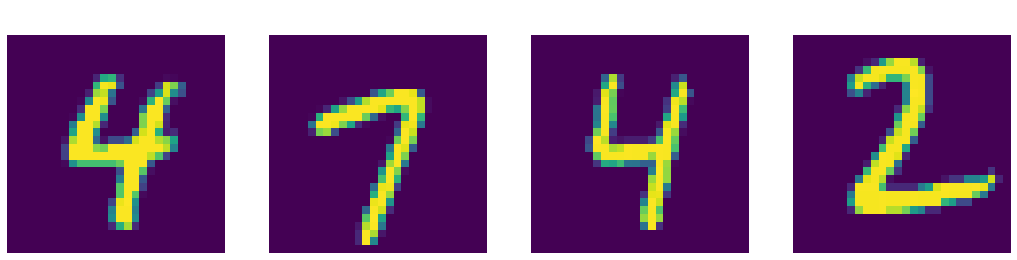

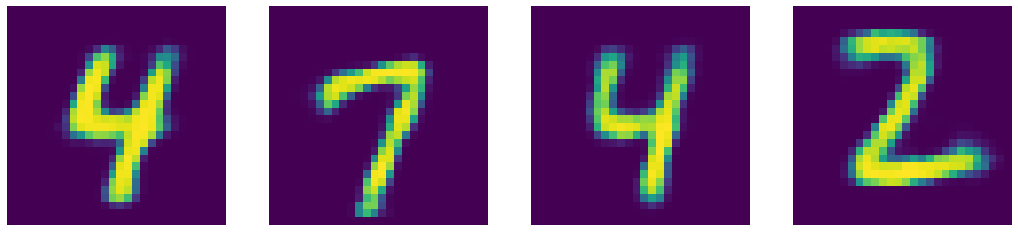

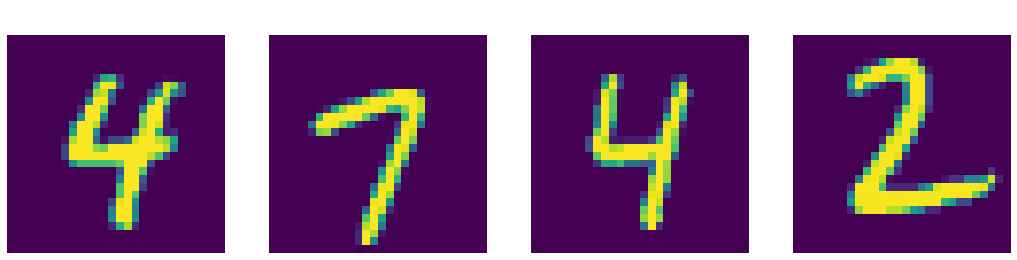

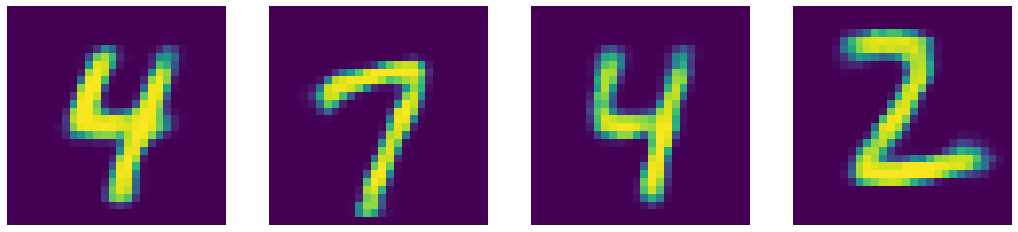

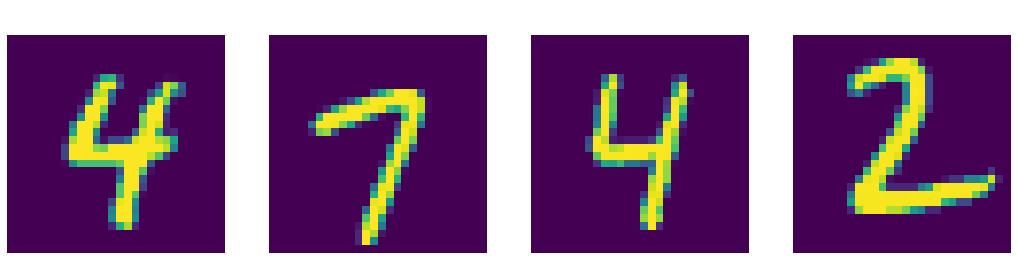

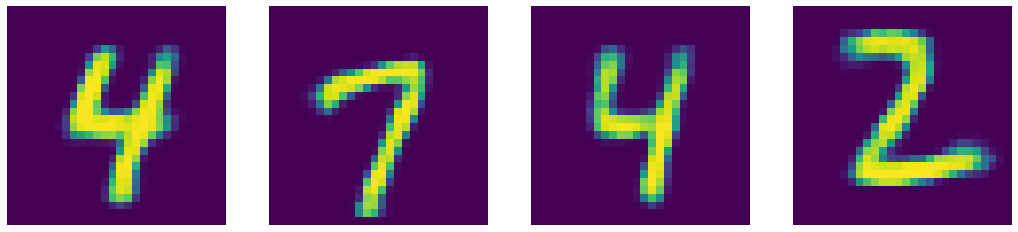

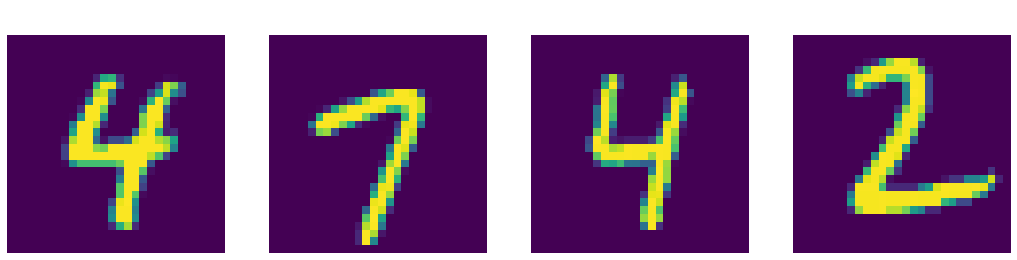

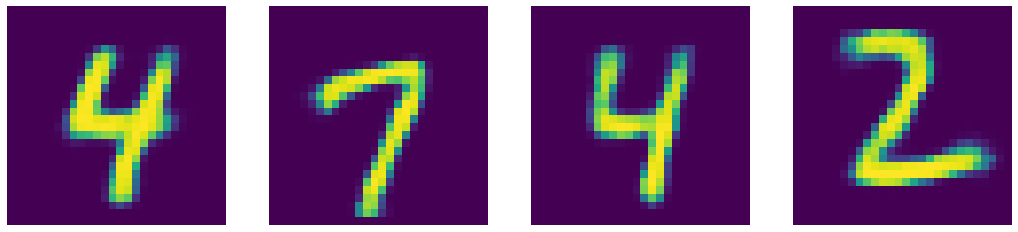

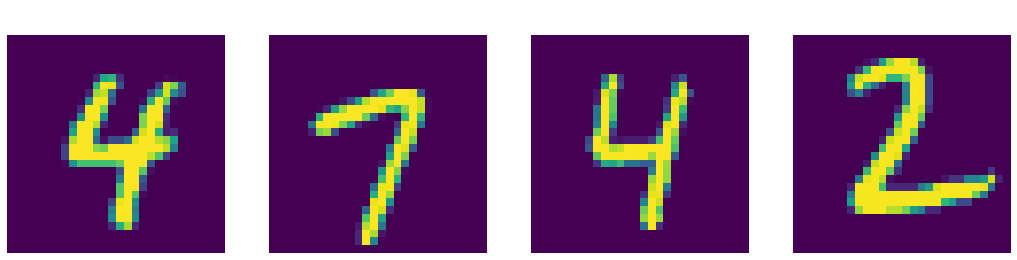

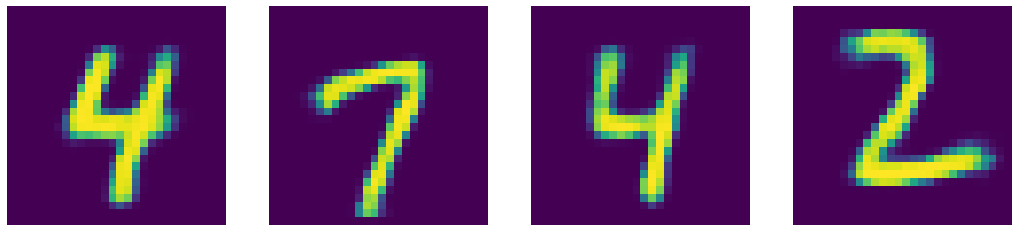

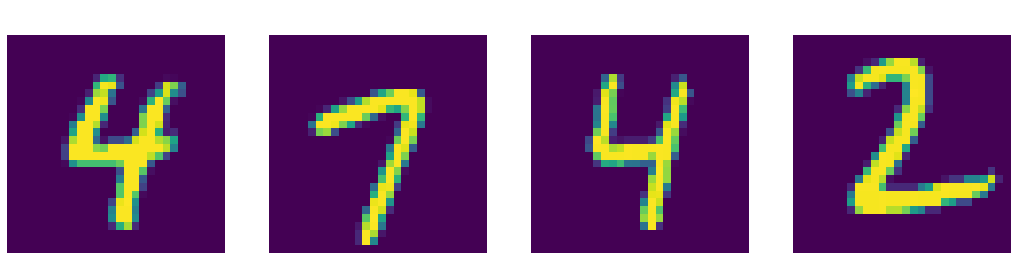

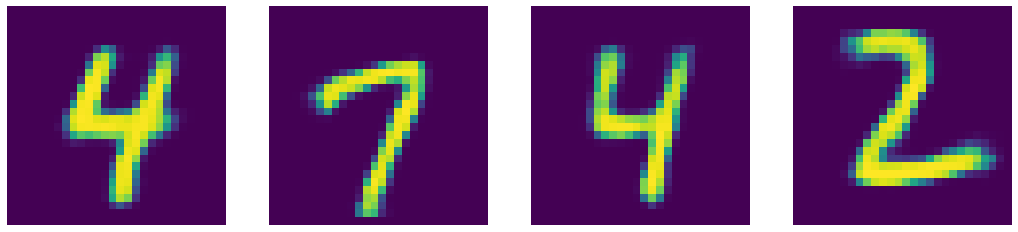

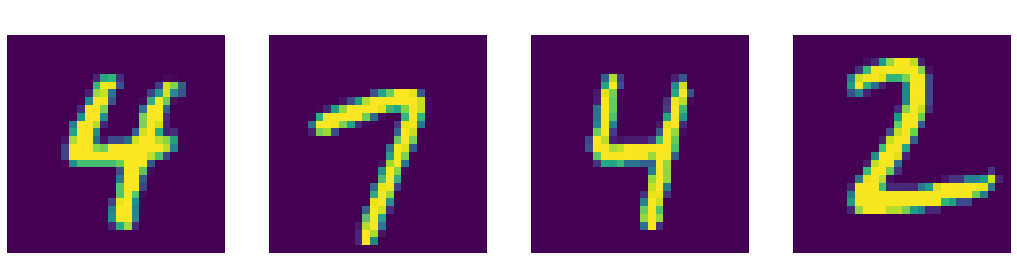

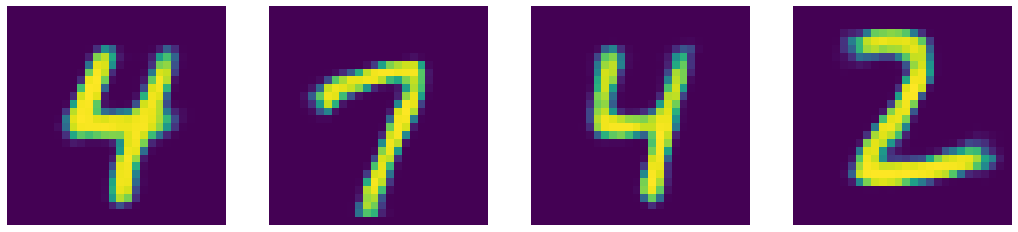

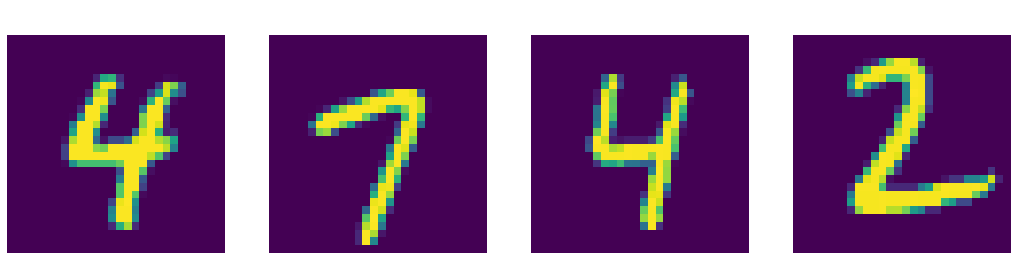

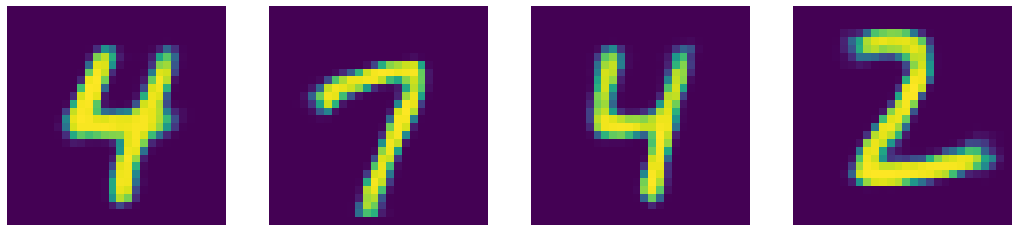

In [ ]:
start = time.time()
epochs = 10
codes = dict(μ=list(), logσ2=list(), y=list())
for epoch in range(epochs + 1):
    if epoch > 0:
        # Training
        print('EPOCH:', epoch)
        loss = 0
        train_loss = 0
        #for step, (x, _) in enumerate(my_train_loader):
            #my_model.setTraining(True)
        for x in my_train_loader:
            x = x['image']
            my_model.Training = True
            #with tf.GradientTape() as tape:
            #    xhat, mu, logvar = my_model(x)
            #    loss = loss_function(x, xhat, mu, logvar)
            #    train_loss += loss
            with tf.GradientTape() as t: #grace
              x_hat, mu, logvar = my_model(x)
              loss_fn = BCE_KLD(mu, logvar)
              loss = loss_fn(x, x_hat)
              train_loss += loss.numpy()

              


            #if step % 100 == 0:
                #print("Step :", step, " Loss (Mean):", train_loss)
              grads = t.gradient(loss, my_model.trainable_variables)
        #grads = tape.gradient(getLoss, my_model.trainable_variables)
            #print(grads)
            optimizer.apply_gradients(zip(grads, my_model.trainable_variables))
    
    # Testing
    means, logvars, labels = list(), list(), list()
    test_loss = 0
    for x in my_test_loader:
        y = x['label']
        x = x['image']
        my_model.training = False
        x_hat, mu, logvar = my_model(x)
        loss_fn = BCE_KLD(mu, logvar)
        loss = loss_fn(x, x_hat)
        test_loss += loss.numpy()

        #test_loss = loss(x, xhat, mu, logvar)
        
        # =====================log=======================
        means.append(mu)
        logvars.append(logvar)
        labels.append(y)
    # ===================log========================
    codes['μ'].append(tf.concat(means, 0))
    codes['logσ2'].append(tf.concat(logvars, 0))
    codes['y'].append(tf.concat(labels, 0))
    #test_loss /= len(my_test_loader)
    test_loss /= 10000
    print(f'====> Test set loss: {test_loss:.4f}')
    display_images(x, x_hat, 1, f'Epoch {epoch}')
end = time.time()
print("Time elapsed", end-start)